# Table of Contents
- [ GroupBy and Aggregate ](#_groupby and aggregate ) 
- [  Adding a 'weekday' column to our dataframe](#_ adding a 'weekday' column to our dataframe) 
  - [ Adding up the cyclists by weekday](#_adding up the cyclists by weekday) 
- [ Putting bikes together](#_putting bikes together) 
  - [ More GroupBy Magic](#_more groupby magic) 


# GroupBy and Aggregate <a name="_groupby and aggregate "></a>

This notebook is based in it's first part on notebook 4 from the Pandas Cookbook: https://github.com/jvns/pandas-cookbook

And the documentation here on Split-Apply-Combine: http://pandas.pydata.org/pandas-docs/stable/groupby.html

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#  Adding a 'weekday' column to our dataframe<a name="_ adding a 'weekday' column to our dataframe"></a>

First, we need to load up the data. We've done this before.

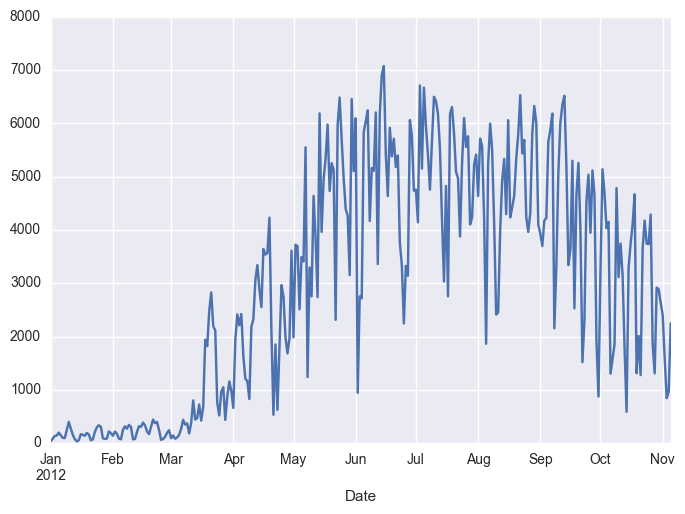

In [2]:
bikes = pd.read_csv('data/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
bikes['Berri 1'].plot()

Next up, we're just going to look at the Berri bike path.

In [13]:
berri_bikes = bikes[['Berri 1']].copy()

In [14]:
berri_bikes[:5]

,Berri 1
Date,
2012-01-01,35
2012-01-02,83
2012-01-03,135
2012-01-04,144
2012-01-05,197


Next, we need to add a 'weekday' column. Firstly, we can get the weekday from the index. We haven't talked about indexes yet, but the index is what's on the left on the above dataframe, under 'Date'. It's basically all the days of the year.  It's how we refer to rows in the dataframe, and how we make plots simpler (the index is automagically the X axis).

In [17]:
berri_bikes.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30',
               '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03',
               '2012-11-04', '2012-11-05'],
              dtype='datetime64[ns]', name='Date', length=310, freq=None)

You can see that actually some of the days are missing -- only 310 days of the year are actually there. Who knows why.

Pandas has a bunch of really great time series functionality, so if we wanted to get the day of the month for each row, we could do it like this:

In [19]:
berri_bikes.index.day

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
       26, 27, 28, 29, 30, 31,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29, 30, 31,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13

We actually want the weekday, though:

In [20]:
berri_bikes.index.weekday

array([6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0,
       1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
       3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
       5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6,
       0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
       4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5,
       6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0,
       1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
       3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
       5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6,
       0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
       4, 5,

These are the days of the week, where 0 is Monday. I found out that 0 was Monday by checking on a calendar.

Now that we know how to *get* the weekday, we can add it as a column in our dataframe like this:

In [21]:
berri_bikes['weekday'] = berri_bikes.index.weekday
berri_bikes[:5]

,Berri 1,weekday
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1
2012-01-04,144,2
2012-01-05,197,3


## Adding up the cyclists by weekday<a name="_adding up the cyclists by weekday"></a>


Dataframes have a `.groupby()` method that is similar to SQL groupby or Excel pivots, if you're familiar with them. I'm not going to explain more about it right now -- if you want to to know more, [the documentation](http://pandas.pydata.org/pandas-docs/stable/groupby.html) is really good.

Basically, when we "group by" we combine things that have the same value for a field -- in this case, weekday numbers.

In this case, `berri_bikes.groupby('weekday').aggregate(sum)` means "Group the rows by weekday and then add up all the values with the same weekday".

In [25]:
weekday_counts = berri_bikes.groupby('weekday').aggregate(sum)
weekday_counts

,Berri 1
weekday,
0,134298
1,135305
2,152972
3,160131
4,141771
5,101578
6,99310


It's hard to remember what 0, 1, 2, 3, 4, 5, 6 mean, so we can fix it up by just setting what the index values should be by hand:

In [27]:
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts

,Berri 1
Monday,134298
Tuesday,135305
Wednesday,152972
Thursday,160131
Friday,141771
Saturday,101578
Sunday,99310


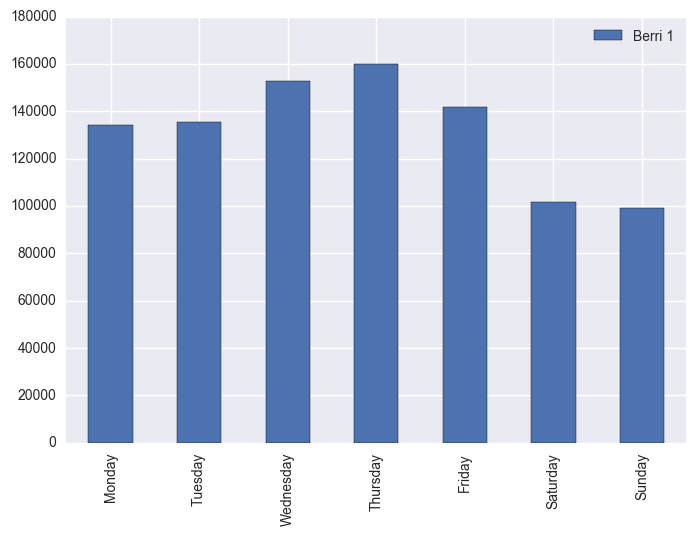

In [28]:
weekday_counts.plot(kind='bar')

So it looks like Montrealers are commuter cyclists -- they bike much more during the week. Neat!

# Putting bikes together<a name="_putting bikes together"></a>

Let's put all that together, to prove how easy it is. 6 lines of magical pandas!

If you want to play around, try changing `sum` to `max`, `np.median`, or any other function you like.

In [ ]:
bikes = pd.read_csv('data/bikes.csv', 
                    sep=';', encoding='latin1', 
                    parse_dates=['Date'], dayfirst=True, 
                    index_col='Date')
# Add the weekday column
berri_bikes = bikes[['Berri 1']].copy()
berri_bikes['weekday'] = berri_bikes.index.weekday

# Add up the number of cyclists by weekday, and plot! Or change to np.median, max, min, np.mean...
weekday_counts = berri_bikes.groupby('weekday').aggregate(sum)
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts.plot(kind='bar')

## More GroupBy Magic<a name="_more groupby magic"></a>

In [29]:
# notice I didn't make the year the index this time...
rain = pd.read_csv('data/Paris_Rainfall_Unpivoted.csv')

In [30]:
rain.head(10)

,Year,Month,Value
0,1688,Jan,NaN
1,1688,Feb,NaN
2,1688,Mar,NaN
3,1688,Apr,NaN
4,1688,May,NaN
5,1688,Jun,75.0
6,1688,Jul,47.0
7,1688,Aug,9.0
8,1688,Sep,43.0
9,1688,Oct,46.0


An actual "groupby" object needs a function after it to be useful.  See...

In [31]:
rain.groupby('Year')  # this doesn't show anything useful. It's not a dataframe yet.

In [33]:
# Doing something to it, like describe, makes it something visible:
rain.groupby('Year').describe().head(20)

Value
Year                  
1688 count    7.000000
     mean    44.714286
     std     19.241572
     min      9.000000
     25%     43.500000
     50%     46.000000
     75%     48.000000
     max     75.000000
1689 count   12.000000
     mean    40.916667
     std     27.975503
     min     18.000000
     25%     21.500000
     50%     36.500000
     75%     46.250000
     max    116.000000
1690 count   12.000000
     mean    47.416667
     std     24.640906
     min      9.000000

Now we use an "aggregate" function on the group and tell it to use the function sum():

In [34]:
rain.groupby('Year').aggregate(sum).head()

,Value
Year,
1688,313.0
1689,491.0
1690,569.0
1691,NaN
1692,NaN


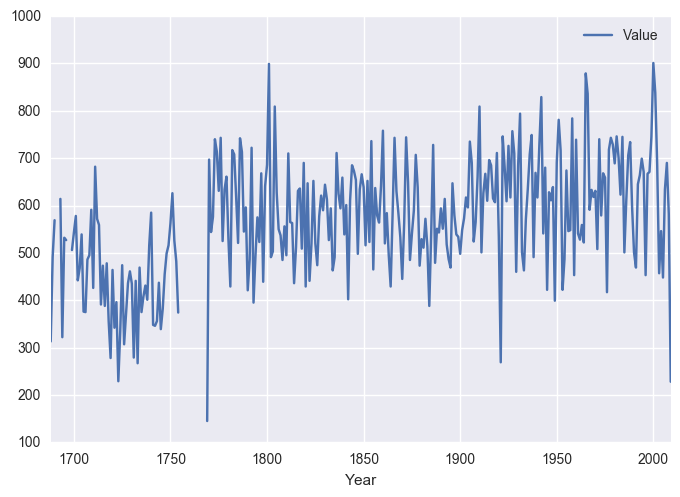

In [35]:
rain.groupby('Year').aggregate(sum).plot()

In [36]:
# here we use a numpy function, np.mean() -- notice you don't write the () when you use these as arguments!
rain.groupby(["Month"]).aggregate(np.mean)

,Year,Value
Month,,
Apr,1848.5,43.758278
Aug,1848.5,50.973597
Dec,1848.5,46.993399
Feb,1848.5,36.440397
Jan,1848.5,43.052980
Jul,1848.5,55.920530
Jun,1848.5,52.834437
Mar,1848.5,38.354305
May,1848.5,53.817881


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c7106d8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10cefdb00>]], dtype=object)

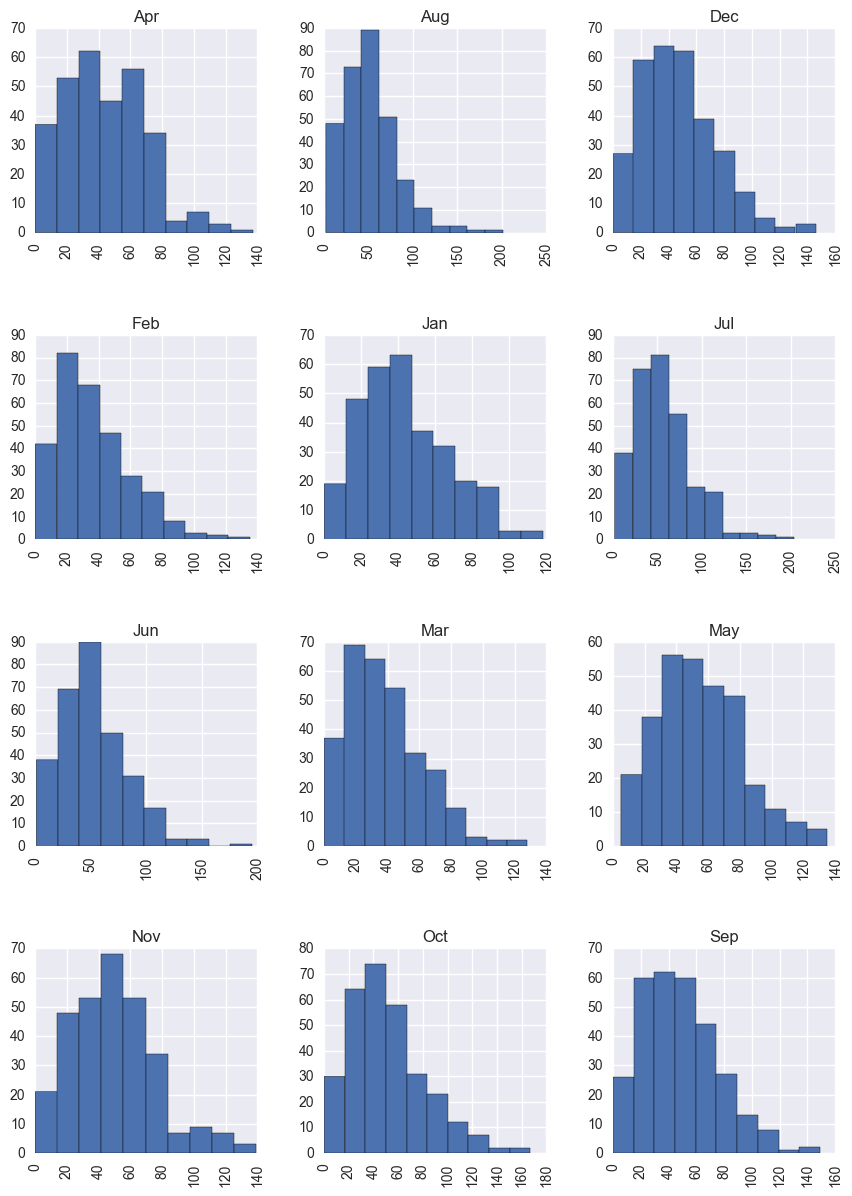

In [37]:
# some plot types will do groups for you, like this one; just say what you want to group "by"
rain.hist("Value", by="Month", figsize=(10,15))

In [45]:
# get the sum by year and sort descending, take top 10:
rain.groupby("Year").sum().head() # .sort_values(by="Value",ascending=False)[0:10]

,Value
Year,
1688,313.0
1689,491.0
1690,569.0
1691,NaN
1692,NaN


In [46]:
#  Aggregate(sum) and .sum()  do the same thing.
# get the sum by year and sort descending, take top 10:
rain.groupby("Year").aggregate(sum).head() #.sort_values(by="Value",ascending=False)[0:10]

,Value
Year,
1688,313.0
1689,491.0
1690,569.0
1691,NaN
1692,NaN


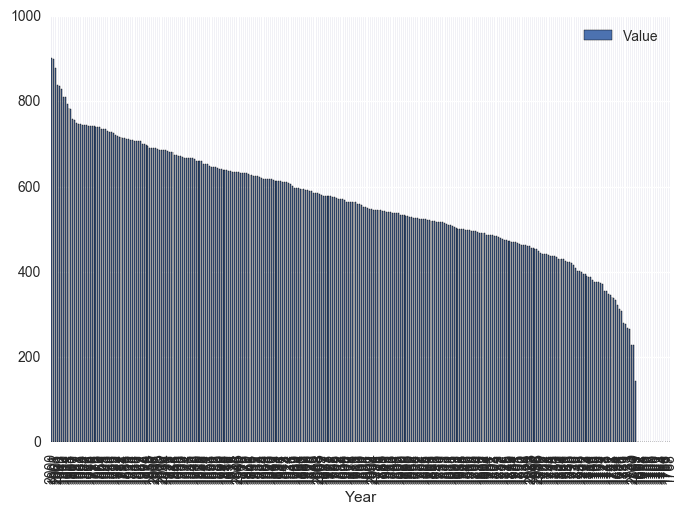

In [47]:
# get the sum by year and sort descending, then plot them all as bars!
rain.groupby("Year").sum().sort_values(by="Value",ascending=False).plot(kind="bar")

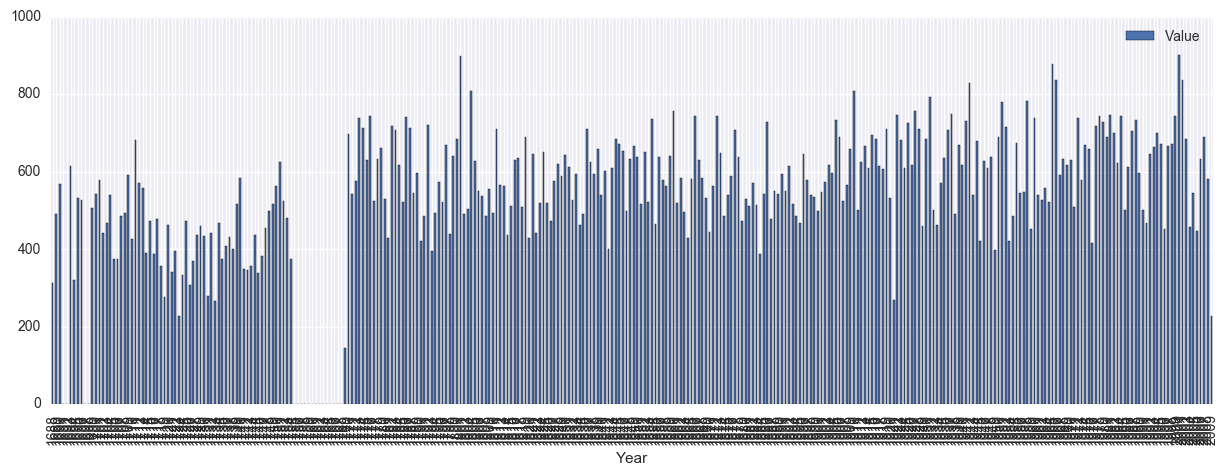

In [48]:
# get the sum by year and plot, not sorted.  The years should be increasing on the X axis.
rain.groupby("Year").sum().plot(kind="bar", figsize=(15, 5))

GroupBy Objects are dicts, with keys being how they are grouped.

In [49]:
rain.groupby("Month").groups

{'Apr': Int64Index([   3,   15,   27,   39,   51,   63,   75,   87,   99,  111,
             ...
             3747, 3759, 3771, 3783, 3795, 3807, 3819, 3831, 3843, 3855],
            dtype='int64', length=322),
 'Aug': Int64Index([   7,   19,   31,   43,   55,   67,   79,   91,  103,  115,
             ...
             3751, 3763, 3775, 3787, 3799, 3811, 3823, 3835, 3847, 3859],
            dtype='int64', length=322),
 'Dec': Int64Index([  11,   23,   35,   47,   59,   71,   83,   95,  107,  119,
             ...
             3755, 3767, 3779, 3791, 3803, 3815, 3827, 3839, 3851, 3863],
            dtype='int64', length=322),
 'Feb': Int64Index([   1,   13,   25,   37,   49,   61,   73,   85,   97,  109,
             ...
             3745, 3757, 3769, 3781, 3793, 3805, 3817, 3829, 3841, 3853],
            dtype='int64', length=322),
 'Jan': Int64Index([   0,   12,   24,   36,   48,   60,   72,   84,   96,  108,
             ...
             3744, 3756, 3768, 3780, 3792, 3804, 3816, 3828

This means simple dict operations work on them --


In [50]:
rain.groupby("Month").groups['Oct']

Int64Index([   9,   21,   33,   45,   57,   69,   81,   93,  105,  117,
            ...
            3753, 3765, 3777, 3789, 3801, 3813, 3825, 3837, 3849, 3861],
           dtype='int64', length=322)

In [54]:
# and you can iterate over them:
years = rain.groupby("Year")
# special kind of dict that doesn't allow items() -- but works same way:
for name, group in years:
    print("In group ",name)
    print(group)

In group  1688
    Year Month  Value
0   1688   Jan    NaN
1   1688   Feb    NaN
2   1688   Mar    NaN
3   1688   Apr    NaN
4   1688   May    NaN
5   1688   Jun   75.0
6   1688   Jul   47.0
7   1688   Aug    9.0
8   1688   Sep   43.0
9   1688   Oct   46.0
10  1688   Nov   44.0
11  1688   Dec   49.0
In group  1689
    Year Month  Value
12  1689   Jan   36.0
13  1689   Feb   22.0
14  1689   Mar   22.0
15  1689   Apr   37.0
16  1689   May   18.0
17  1689   Jun   20.0
18  1689   Jul  116.0
19  1689   Aug   41.0
20  1689   Sep   45.0
21  1689   Oct   50.0
22  1689   Nov   66.0
23  1689   Dec   18.0
In group  1690
    Year Month  Value
24  1690   Jan   70.0
25  1690   Feb   32.0
26  1690   Mar   43.0
27  1690   Apr   24.0
28  1690   May   68.0
29  1690   Jun   63.0
30  1690   Jul   73.0
31  1690   Aug   79.0
32  1690   Sep   21.0
33  1690   Oct   64.0
34  1690   Nov   23.0
35  1690   Dec    9.0
In group  1691
    Year Month  Value
36  1691   Jan    NaN
37  1691   Feb    NaN
38  1691   Mar  

In [60]:
# you can use the groupby object to them aggregate, of course. This results in a data frame, not a groupby object
years.aggregate(np.median).head()

,Value
Year,
1688,46.0
1689,36.5
1690,53.0
1691,NaN
1692,NaN


In [61]:
# size of each group (it's months, so 12, right?)
years.size().head()

Year
1688    12
1689    12
1690    12
1691    12
1692    12
dtype: int64

We can do multiple aggregate functions at once, if we put them in a dictionary with names for the columns.  This is a good way to get descriptive stats you can use later.

In [63]:
yearstats = years["Value"].agg({"mean": np.mean, "median": np.median, "min": min, "max": max})
yearstats.head()

,max,mean,median,min
Year,,,,
1688,75.0,44.714286,46.0,9.0
1689,116.0,40.916667,36.5,18.0
1690,79.0,47.416667,53.0,9.0
1691,NaN,NaN,NaN,NaN
1692,NaN,NaN,NaN,NaN


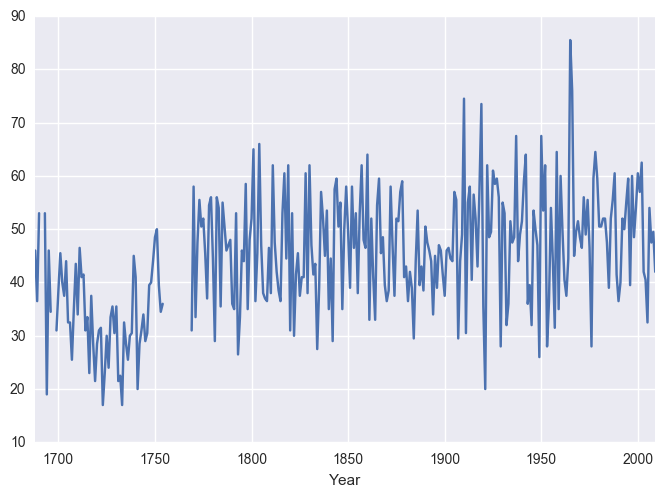

In [64]:
yearstats['median'].plot()

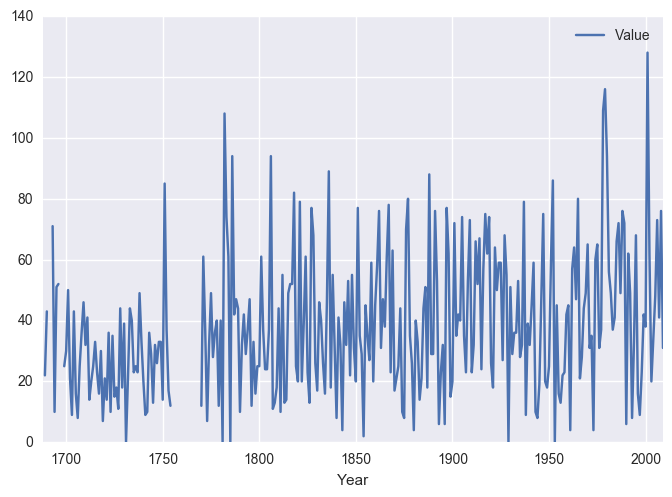

In [67]:
# if you are working with a group object, there is also this convenience method get_group - which does the same as above:
rain.groupby("Month").get_group("Mar").plot("Year", "Value")